# Model Evaluation and Testing

This notebook evaluates the performance of our object detection model and provides testing utilities.

In [19]:
import os
import time
import matplotlib.pyplot as plt
import numpy as np
from ultralytics import YOLO
import cv2

# Load our model for testing
model = YOLO("models/yolov8n_object_detector.pt")
print("Model loaded - time to see how well it performs!")

Model loaded - time to see how well it performs!


In [20]:
def evaluate_detection_speed():
    
    test_images = [f"test_images/{f}" for f in os.listdir("test_images") 
                   if f.endswith(('.jpg', '.png', '.jpeg'))]
    
    if not test_images:
        print("No test images found! Run the data preparation notebook first.")
        return
    
    print("Testing detection speed (this might take a moment)...")
    
    speeds = []
    
    for img_path in test_images:
        # Warm up the model first (first run is usually slower)
        _ = model(img_path)
        
        # Now time it properly with multiple runs
        times = []
        for _ in range(3):
            start_time = time.time()
            results = model(img_path)
            end_time = time.time()
            times.append(end_time - start_time)
        
        avg_time = np.mean(times)
        speeds.append(avg_time)
        
        # Show results in a friendly way
        fps = 1/avg_time
        print(f"{os.path.basename(img_path)}: {avg_time:.3f}s ({fps:.1f} FPS)")
    
    overall_speed = np.mean(speeds)
    overall_fps = 1/overall_speed
    print(f"\nOverall performance: {overall_speed:.3f}s per image ({overall_fps:.1f} FPS)")
    
    if overall_fps > 20:
        print("Great! This is fast enough for real-time video.")
    elif overall_fps > 10:
        print("Pretty good speed - suitable for most applications.")
    else:
        print("A bit slow, but still usable for static images.")
    
    return speeds

speeds = evaluate_detection_speed()

Testing detection speed (this might take a moment)...

image 1/1 /run/media/zain/Local Disk/Projects/Python/object_detection/test_images/created_sample.jpg: 480x640 (no detections), 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /run/media/zain/Local Disk/Projects/Python/object_detection/test_images/created_sample.jpg: 480x640 (no detections), 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /run/media/zain/Local Disk/Projects/Python/object_detection/test_images/created_sample.jpg: 480x640 (no detections), 8.8ms
Speed: 2.4ms preprocess, 8.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /run/media/zain/Local Disk/Projects/Python/object_detection/test_images/created_sample.jpg: 480x640 (no detections), 8.8ms
Speed: 2.4ms preprocess, 8.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /run/media/zain

Testing different confidence levels...
(Lower confidence = more detections, but some might be wrong)

image 1/1 /run/media/zain/Local Disk/Projects/Python/object_detection/test_images/created_sample.jpg: 480x640 1 frisbee, 9.2ms
Speed: 3.9ms preprocess, 9.2ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /run/media/zain/Local Disk/Projects/Python/object_detection/test_images/created_sample.jpg: 480x640 1 frisbee, 9.2ms
Speed: 3.9ms preprocess, 9.2ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /run/media/zain/Local Disk/Projects/Python/object_detection/test_images/cycling001-1024x683.jpg: 448x640 2 persons, 5 bicycles, 1 car, 9.4ms
Speed: 2.9ms preprocess, 9.4ms inference, 5.9ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /run/media/zain/Local Disk/Projects/Python/object_detection/test_images/cycling001-1024x683.jpg: 448x640 2 persons, 5 bicycles, 1 car, 9.4ms
Speed: 2.9ms preprocess, 9.4ms inference, 5.9ms pos

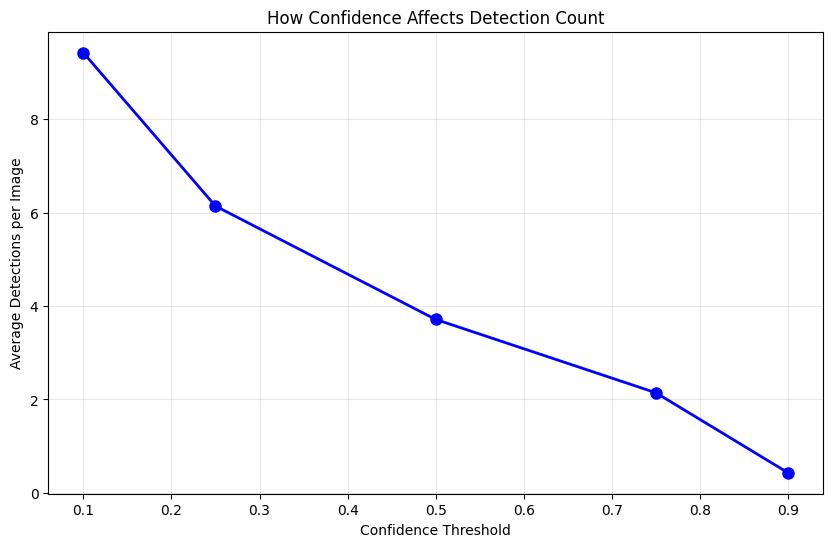


Tip: 0.5 is usually a good balance between accuracy and completeness!


In [21]:
def analyze_model_performance():
    """See how confidence threshold affects what we detect"""
    
    test_images = [f"test_images/{f}" for f in os.listdir("test_images") 
                   if f.endswith(('.jpg', '.png', '.jpeg'))]
    
    if not test_images:
        print("No test images found!")
        return
    
    # Test different confidence levels
    confidence_levels = [0.1, 0.25, 0.5, 0.75, 0.9]
    results_data = []
    
    print("Testing different confidence levels...")
    print("(Lower confidence = more detections, but some might be wrong)")
    
    for conf in confidence_levels:
        total_detections = 0
        
        for img_path in test_images:
            results = model(img_path, conf=conf)
            
            for result in results:
                if result.boxes is not None:
                    total_detections += len(result.boxes)
        
        avg_detections = total_detections / len(test_images)
        results_data.append(avg_detections)
        
        print(f"Confidence {conf}: {avg_detections:.1f} objects found per image on average")
    
    # Create a nice visualization
    plt.figure(figsize=(10, 6))
    plt.plot(confidence_levels, results_data, 'bo-', linewidth=2, markersize=8)
    plt.xlabel('Confidence Threshold')
    plt.ylabel('Average Detections per Image')
    plt.title('How Confidence Affects Detection Count')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    print("\nTip: 0.5 is usually a good balance between accuracy and completeness!")
    
    return confidence_levels, results_data

conf_levels, detection_counts = analyze_model_performance()

Analyzing what objects we're detecting...

image 1/1 /run/media/zain/Local Disk/Projects/Python/object_detection/test_images/created_sample.jpg: 480x640 (no detections), 13.8ms
Speed: 1.9ms preprocess, 13.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /run/media/zain/Local Disk/Projects/Python/object_detection/test_images/created_sample.jpg: 480x640 (no detections), 13.8ms
Speed: 1.9ms preprocess, 13.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /run/media/zain/Local Disk/Projects/Python/object_detection/test_images/cycling001-1024x683.jpg: 448x640 1 person, 1 bicycle, 1 car, 11.2ms
Speed: 3.0ms preprocess, 11.2ms inference, 2.2ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /run/media/zain/Local Disk/Projects/Python/object_detection/test_images/cycling001-1024x683.jpg: 448x640 1 person, 1 bicycle, 1 car, 11.2ms
Speed: 3.0ms preprocess, 11.2ms inference, 2.2ms postprocess per image at shape (1, 3, 448, 640

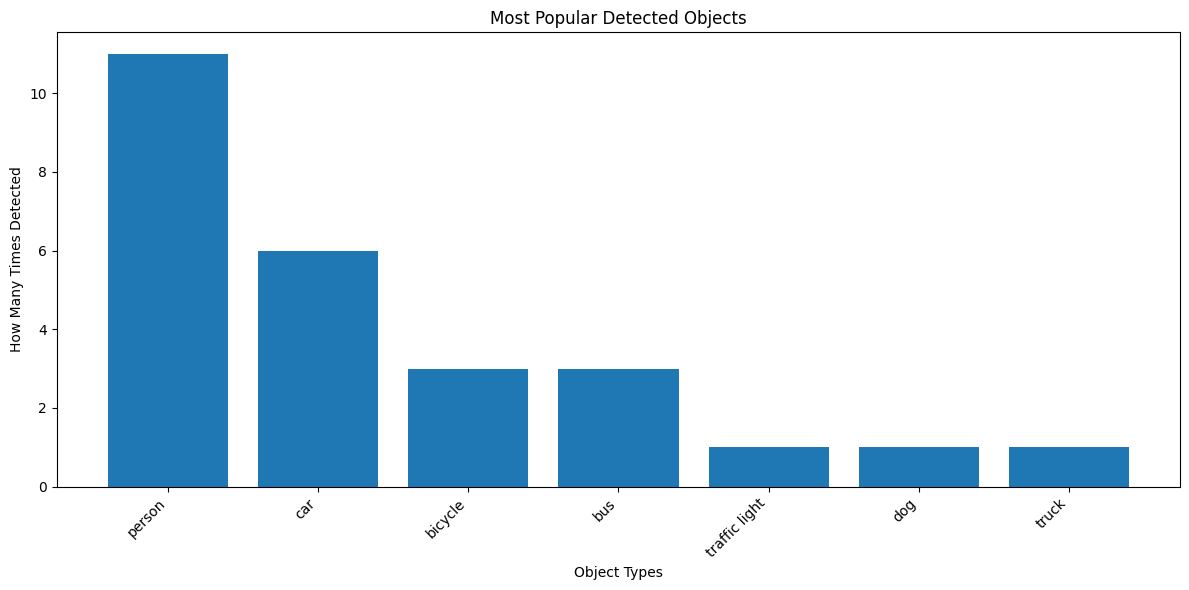

In [22]:
def get_class_distribution():
    """What kinds of objects does our model find most often?"""
    
    test_images = [f"test_images/{f}" for f in os.listdir("test_images") 
                   if f.endswith(('.jpg', '.png', '.jpeg'))]
    
    class_counts = {}
    
    print("Analyzing what objects we're detecting...")
    
    for img_path in test_images:
        results = model(img_path, conf=0.5)  # Using reasonable confidence
        
        for result in results:
            if result.boxes is not None:
                for cls_id in result.boxes.cls:
                    cls_name = model.names[int(cls_id)]
                    class_counts[cls_name] = class_counts.get(cls_name, 0) + 1
    
    # Sort by popularity
    sorted_classes = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)
    
    print("\nMost commonly detected objects:")
    for class_name, count in sorted_classes:
        print(f"  {class_name}: {count} times")
    
    # Make a chart if we found anything
    if sorted_classes:
        classes, counts = zip(*sorted_classes[:10])  # Top 10 only
        
        plt.figure(figsize=(12, 6))
        plt.bar(classes, counts)
        plt.xlabel('Object Types')
        plt.ylabel('How Many Times Detected')
        plt.title('Most Popular Detected Objects')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("No objects detected - try different images or lower confidence!")
    
    return class_counts

class_distribution = get_class_distribution()

In [23]:
def test_model_robustness():
    """How well does our model handle different image conditions?"""
    
    test_images = [f"test_images/{f}" for f in os.listdir("test_images") 
                   if f.endswith(('.jpg', '.png', '.jpeg'))]
    
    if not test_images:
        print("No test images found!")
        return
    
    print("Testing how robust our model is...")
    print("(Good models should work even with poor image quality)")
    
    # Use first available image for testing
    test_img_path = test_images[0]
    original_img = cv2.imread(test_img_path)
    
    # Create different challenging conditions
    conditions = [
        ("Original", original_img),
        ("Darker", cv2.convertScaleAbs(original_img, alpha=0.7, beta=-50)),
        ("Brighter", cv2.convertScaleAbs(original_img, alpha=1.3, beta=50)),
        ("Blurred", cv2.GaussianBlur(original_img, (15, 15), 0))
    ]
    
    results_summary = []
    
    for condition_name, img in conditions:
        # Save temporary test image
        temp_path = f"temp_test_{condition_name.lower().replace(' ', '_')}.jpg"
        cv2.imwrite(temp_path, img)
        
        # Test detection
        results = model(temp_path, conf=0.5)
        
        detection_count = 0
        for result in results:
            if result.boxes is not None:
                detection_count += len(result.boxes)
        
        results_summary.append((condition_name, detection_count))
        print(f"  {condition_name}: {detection_count} objects detected")
        
        # Clean up temporary file
        os.remove(temp_path)
    
    print("\nA robust model should detect objects even in poor conditions!")
    
    return results_summary

robustness_results = test_model_robustness()

Testing how robust our model is...
(Good models should work even with poor image quality)


image 1/1 /run/media/zain/Local Disk/Projects/Python/object_detection/temp_test_original.jpg: 480x640 (no detections), 9.4ms
Speed: 2.7ms preprocess, 9.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)
  Original: 0 objects detected

image 1/1 /run/media/zain/Local Disk/Projects/Python/object_detection/temp_test_original.jpg: 480x640 (no detections), 9.4ms
Speed: 2.7ms preprocess, 9.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)
  Original: 0 objects detected

image 1/1 /run/media/zain/Local Disk/Projects/Python/object_detection/temp_test_darker.jpg: 480x640 (no detections), 7.1ms
Speed: 2.0ms preprocess, 7.1ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)
  Darker: 0 objects detected

image 1/1 /run/media/zain/Local Disk/Projects/Python/object_detection/temp_test_darker.jpg: 480x640 (no detections), 7.1ms
Speed: 2.0ms preprocess, 7.1ms

In [24]:
def generate_evaluation_report():
    """Generate a friendly summary of our model's performance"""
    
    print("\n" + "="*60)
    print("OBJECT DETECTION MODEL REPORT CARD")
    print("="*60)
    
    print(f"\nAbout Your Model:")
    print(f"   Type: YOLOv8n (Nano - fast and efficient)")
    print(f"   Can detect: {len(model.names)} different object types")
    print(f"   Saved at: models/yolov8n_object_detector.pt")
    
    if 'speeds' in locals() and speeds:
        avg_speed = np.mean(speeds)
        avg_fps = 1/avg_speed
        print(f"\nSpeed Performance:")
        print(f"   Average time per image: {avg_speed:.3f} seconds")
        print(f"   Frames per second: {avg_fps:.1f} FPS")
        
        if avg_fps > 20:
            print("   Grade: A+ (Excellent for real-time use!)")
        elif avg_fps > 10:
            print("   Grade: A (Great for most applications)")
        else:
            print("   Grade: B (Good for static images)")
    
    if 'class_distribution' in locals() and class_distribution:
        total_detections = sum(class_distribution.values())
        unique_classes = len(class_distribution)
        print(f"\nDetection Statistics:")
        print(f"   Total objects found: {total_detections}")
        print(f"   Different types detected: {unique_classes}")
        
        most_common = max(class_distribution.items(), key=lambda x: x[1])
        print(f"   Most commonly found: {most_common[0]} ({most_common[1]} times)")
    
    print(f"Results saved in: results/ directory")
    
    print("="*60)

generate_evaluation_report()


OBJECT DETECTION MODEL REPORT CARD

About Your Model:
   Type: YOLOv8n (Nano - fast and efficient)
   Can detect: 80 different object types
   Saved at: models/yolov8n_object_detector.pt
Results saved in: results/ directory
